<a href="https://colab.research.google.com/github/alissonviana1/My-TCC/blob/main/MyTCC_RBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [207]:
df = pd.read_csv('/content/diabetes.csv',sep=',')

In [208]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [209]:
data = df[(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]] != 0).all(axis=1)]

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               336 non-null    int64  
 1   Glucose                   336 non-null    int64  
 2   BloodPressure             336 non-null    int64  
 3   SkinThickness             336 non-null    int64  
 4   Insulin                   336 non-null    int64  
 5   BMI                       336 non-null    float64
 6   DiabetesPedigreeFunction  336 non-null    float64
 7   Age                       336 non-null    int64  
 8   Outcome                   336 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 26.2 KB


In [211]:
data['Outcome'].value_counts()

0    225
1    111
Name: Outcome, dtype: int64

In [212]:
# Separar os atributos (X) da variável target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
# Passo 3: Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
# Passo 4: Implementar o algoritmo k-NN
k = 7  # Exemplo: escolha do valor de k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [214]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [215]:
# Passo 5: Classificar o novo caso
new = [{
    'Pregnancies':1,            
    'Glucose':128,         
    'BloodPressure':88,	          
    'SkinThickness':39,          
    'Insulin':110,           
    'BMI':36.5,             
    'DiabetesPedigreeFunction':1.057,
    'Age':37,                                            
}]

new_case = pd.DataFrame(new)

In [216]:
distances, indices = knn.kneighbors(new_case)

In [217]:
# Adaptar os casos similares para obter uma solução personalizada
similar_cases = X_train.iloc[indices[0]]
y_similar = y_train.iloc[indices[0]]  # Recupera os casos similares
#adapted_cases = adapt_cases(similar_cases)  # Função adapt_cases a ser implementada por você
df_similar = pd.concat([similar_cases, y_similar], axis=1)

df_similar

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
755,1,128,88,39,110,36.5,1.057,37,1
345,8,126,88,36,108,38.5,0.349,49,0
723,5,117,86,30,105,39.1,0.251,42,0
305,2,120,76,37,105,39.7,0.215,29,0
402,5,136,84,41,88,35.0,0.286,35,1
521,3,124,80,33,130,33.2,0.305,26,0
188,8,109,76,39,114,27.9,0.640,31,1


Acurácia: 0.75
Precisão: 0.6666666666666666
Recall: 0.45454545454545453
F1-Score: 0.5405405405405405
Matriz de Confusão:


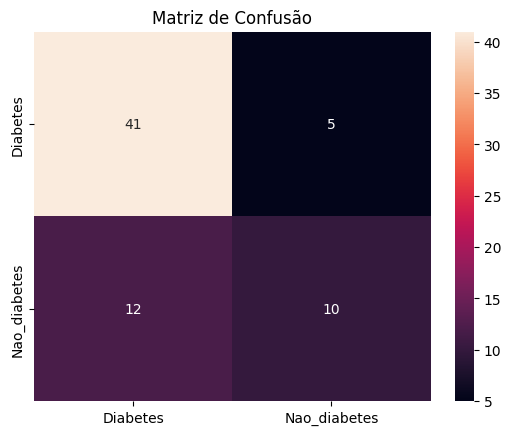

In [218]:

# Passo 6: Avaliar o desempenho do modelo
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Exibir as métricas e matriz de confusão
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Matriz de Confusão:")


classes = ['Diabetes', 'Nao_diabetes'] 

ax = sns.heatmap(confusion_mat, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)

ax.set_title('Matriz de Confusão')

# Exibe o gráfico
plt.show()


In [219]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        46
           1       0.67      0.45      0.54        22

    accuracy                           0.75        68
   macro avg       0.72      0.67      0.68        68
weighted avg       0.74      0.75      0.74        68



In [203]:
k_values = [3, 5, 7, 9, 11]

# Realizar a validação cruzada k-fold para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)  # cv é o número de folds da validação cruzada
    accuracy = np.mean(scores)
    print("Accuracy for k =", k, ":", accuracy)

Accuracy for k = 3 : 0.7201931518876207
Accuracy for k = 5 : 0.7290605794556628
Accuracy for k = 7 : 0.732089552238806
Accuracy for k = 9 : 0.7172958735733099
Accuracy for k = 11 : 0.7321334503950834
